In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import itertools
import datetime
import matplotlib.dates as mdates
import numpy as np

In [6]:
#Read in the data 
# df = pd.read_csv('Data_for_graph.csv’)
# filename = 'Monthly Standard Report 8.xlsx'
# filename = 'Monthly Standard Report 8.xlsx'
filename = 'Month of Mar20 Monthly Standard Report 8.xlsx'
tab_name = 'Raw QC Data'
tab_name2 = 'Weekly Cumulative Collection De'
# directory = '/Users/SPH/qc_data/'
directory = './data/'


min_date = datetime.date(2020, 1,1)
max_date = datetime.date(2020, 2,24)

In [7]:
df = pd.read_excel(directory+filename,sheet_name=tab_name,header=6)
df

,Date of Result,Result Value,Omission Status,QC ID,Lot No.,Level,Units,Site,Analyzer,Analyte
0,Mar 13 2020 09:57,81.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
1,Mar 13 2020 10:11,80.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
2,Mar 13 2020 10:14,70.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
3,Mar 16 2020 11:58,80.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
4,Mar 16 2020 16:28,77.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
5,Mar 16 2020 20:32,85.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
6,Mar 16 2020 22:49,79.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
7,Mar 17 2020 11:43,81.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
8,Mar 17 2020 16:31,80.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
9,Mar 17 2020 19:52,85.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT


In [8]:
df2 = pd.read_excel(directory+filename,sheet_name=tab_name2,header=0)
df2

,InstrumentID,Week Start Date,DeviceLotNumber,Abnormal Rate,# of ABNORMAL results within 30days,# of NORMAL results within 14days,Calculated Abnormal Rate,Unnamed: 7,Unnamed: 8
0,Diana1,2019-08-05,8z711,0.039800,34.0,820.0,0.039813,NaN,0.041463
1,Diana1,2019-08-05,8Z716,0.054000,141.0,2470.0,0.054002,NaN,0.057085
2,Diana1,2019-08-05,95126,0.041600,56.0,1290.0,0.041605,NaN,0.043411
3,Diana2,2019-08-05,8z711,0.037000,29.0,755.0,0.036990,NaN,0.038411
4,Diana2,2019-08-05,8Z716,0.045700,113.0,2357.0,0.045749,NaN,0.047942
5,Diana2,2019-08-05,95126,0.041200,53.0,1233.0,0.041213,NaN,0.042985
6,Diana2,2019-08-05,95336,NaN,NaN,1.0,0.000000,NaN,NaN
7,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Diana1,2019-08-12,8*W16,NaN,NaN,1.0,0.000000,NaN,NaN
9,Diana1,2019-08-12,8z711,0.038100,30.0,758.0,0.038071,NaN,NaN


In [ ]:

markers = itertools.cycle(('+', 'o', '*')) 

#plot the data
fig, ax = plt.subplots(figsize=(20,10))
for InstrumentID in ['Diana1','Diana2','Diana3']:
    marker = next(markers)
    df_tempory = df2[df2['InstrumentID'] == InstrumentID]
    cbar = ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c=(df_tempory['# of ABNORMAL results within 30days']  + df_tempory['# of NORMAL results within 14days']).values,alpha=0.9,s=100,marker=marker,label=InstrumentID,cmap='YlOrBr')

ax.legend()
plt.colorbar(cbar)

for InstrumentID in ['Diana1','Diana2','Diana3']:
    marker = next(markers)
    df_tempory = df2[df2['InstrumentID'] == InstrumentID]
    ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c='k',s=10,marker=marker,label=InstrumentID,alpha=0.5)


ax.set_xlabel('date')
ax.set_ylabel('Calculated abnormal rate')
# plt.savefig('/Users/SPH/qc_data/abnormal_rates.png',dpi=300)

plt.show()

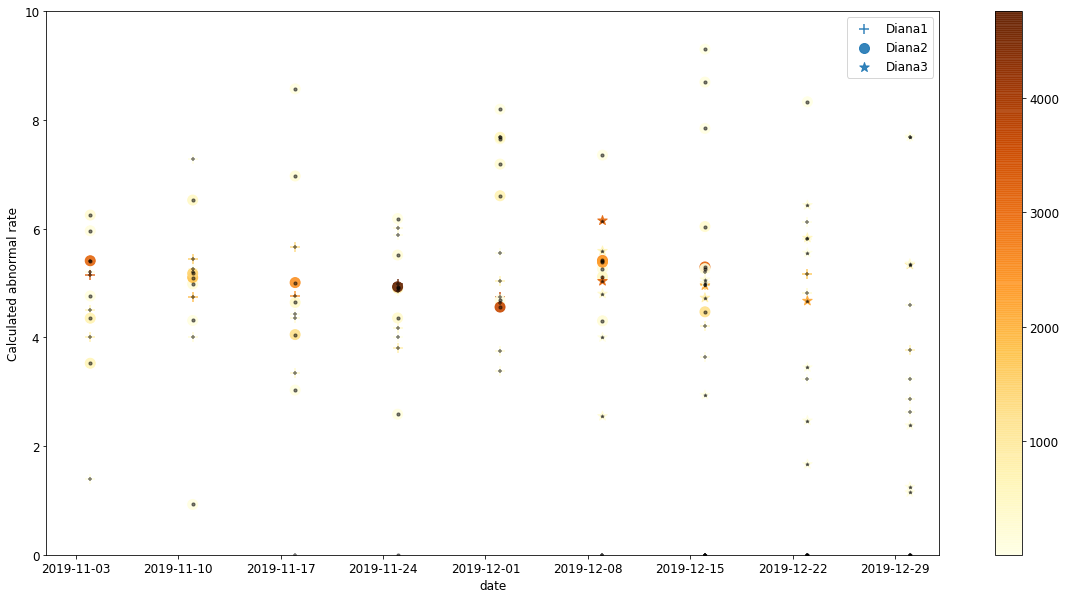

In [27]:

markers = itertools.cycle(('+', 'o', '*')) 

#plot the data
fig, ax = plt.subplots(figsize=(20,10))
for InstrumentID in ['Diana1','Diana2','Diana3']:
    marker = next(markers)
    df_tempory = df2[df2['InstrumentID'] == InstrumentID]
    cbar = ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c=(df_tempory['# of ABNORMAL results within 30days']  + df_tempory['# of NORMAL results within 14days']).values,alpha=0.9,s=100,marker=marker,label=InstrumentID,cmap='YlOrBr')

ax.legend()
plt.colorbar(cbar)

for InstrumentID in ['Diana1','Diana2','Diana3']:
    marker = next(markers)
    df_tempory = df2[df2['InstrumentID'] == InstrumentID]
    ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c='k',s=10,marker=marker,label=InstrumentID,alpha=0.5)


ax.set_ylim([0,10])
ax.set_xlabel('date')
ax.set_ylabel('Calculated abnormal rate')
# plt.savefig('/Users/SPH/qc_data/abnormal_rates.png',dpi=300)
ax.set_xlim([datetime.date(2019, 11, 1), datetime.date(2020, 1, 1)])
plt.show()

In [26]:
pd.to_datetime(df2['Week Start Date'])

0     2019-08-05
1     2019-08-05
2     2019-08-05
3     2019-08-05
4     2019-08-05
5     2019-08-05
6     2019-08-05
7            NaT
8     2019-08-12
9     2019-08-12
10    2019-08-12
11    2019-08-12
12    2019-08-12
13    2019-08-12
14    2019-08-12
15    2019-08-12
16           NaT
17    2019-08-19
18    2019-08-19
19    2019-08-19
20    2019-08-19
21    2019-08-19
22    2019-08-19
23           NaT
24    2019-08-26
25    2019-08-26
26    2019-08-26
27    2019-08-26
28    2019-08-26
29    2019-08-26
         ...    
498   2020-03-23
499   2020-03-23
500   2020-03-23
501   2020-03-23
502   2020-03-23
503   2020-03-23
504   2020-03-23
505   2020-03-23
506   2020-03-23
507   2020-03-23
508   2020-03-23
509   2020-03-23
510   2020-03-23
511          NaT
512   2020-03-30
513   2020-03-30
514   2020-03-30
515   2020-03-30
516   2020-03-30
517   2020-03-30
518   2020-03-30
519   2020-03-30
520   2020-03-30
521   2020-03-30
522   2020-03-30
523   2020-03-30
524   2020-03-30
525   2020-03-

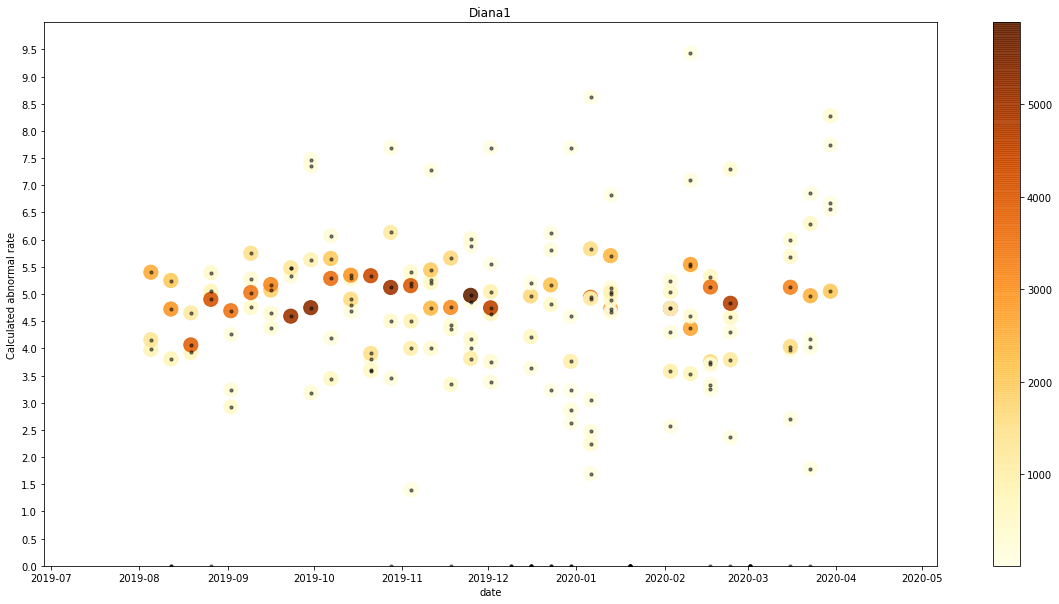

In [11]:
InstrumentID = 'Diana1'

#plot the data
fig, ax = plt.subplots(figsize=(20,10))

df_tempory = df2[df2['InstrumentID'] == InstrumentID]
cbar=ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c=(df_tempory['# of ABNORMAL results within 30days']  + df_tempory['# of NORMAL results within 14days']).values,alpha=0.9,s=200,label=InstrumentID,cmap='YlOrBr')

plt.colorbar(cbar)

ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c='k',s=10,label=InstrumentID,alpha=0.5)

ax.set_yticks(np.arange(0, 10, step=0.5))
ax.set_ylim([0,10])
ax.set_xlabel('date')
ax.set_ylabel('Calculated abnormal rate')
plt.title(InstrumentID)
# plt.savefig('/Users/SPH/qc_data/abnormal_rates.png',dpi=300)

plt.show()

In [12]:
qc_ids = df[' QC ID'].unique()
print(qc_ids)

analyzers = df[' Analyzer'].unique()
print(analyzers)

[u'CONT1' u'CONT2' u'CONT3' u'CEQAL1' u'CEQAL2' u'CEQAL3']
[u'Diana1' u'Diana2' u'Diana3']


In [13]:
list(df)

[u'Date of Result',
 u' Result Value',
 u' Omission Status',
 u' QC ID',
 u' Lot No.',
 u' Level',
 u' Units',
 u' Site',
 u' Analyzer',
 u' Analyte']

In [14]:
#Convert the date column to a recognised format called ‘datetime'
df['Date of Result'] = pd.to_datetime(df['Date of Result'], infer_datetime_format=True)

In [15]:
df['Date of Result']

0      2020-03-13 09:57:00
1      2020-03-13 10:11:00
2      2020-03-13 10:14:00
3      2020-03-16 11:58:00
4      2020-03-16 16:28:00
5      2020-03-16 20:32:00
6      2020-03-16 22:49:00
7      2020-03-17 11:43:00
8      2020-03-17 16:31:00
9      2020-03-17 19:52:00
10     2020-03-17 23:08:00
11     2020-03-18 11:33:00
12     2020-03-18 16:54:00
13     2020-03-18 21:56:00
14     2020-03-19 11:30:00
15     2020-03-19 17:09:00
16     2020-03-19 20:16:00
17     2020-03-19 23:39:00
18     2020-03-20 11:46:00
19     2020-03-20 16:50:00
20     2020-03-20 23:11:00
21     2020-03-21 17:33:00
22     2020-03-21 21:38:00
23     2020-03-23 11:49:00
24     2020-03-23 18:43:00
25     2020-03-23 22:32:00
26     2020-03-24 11:35:00
27     2020-03-24 22:22:00
28     2020-03-25 12:32:00
29     2020-03-25 18:00:00
               ...        
998    2020-03-13 00:21:00
999    2020-03-13 10:19:00
1000   2020-03-13 10:22:00
1001   2020-03-13 10:25:00
1002   2020-03-13 23:20:00
1003   2020-03-14 17:12:00
1

In [16]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


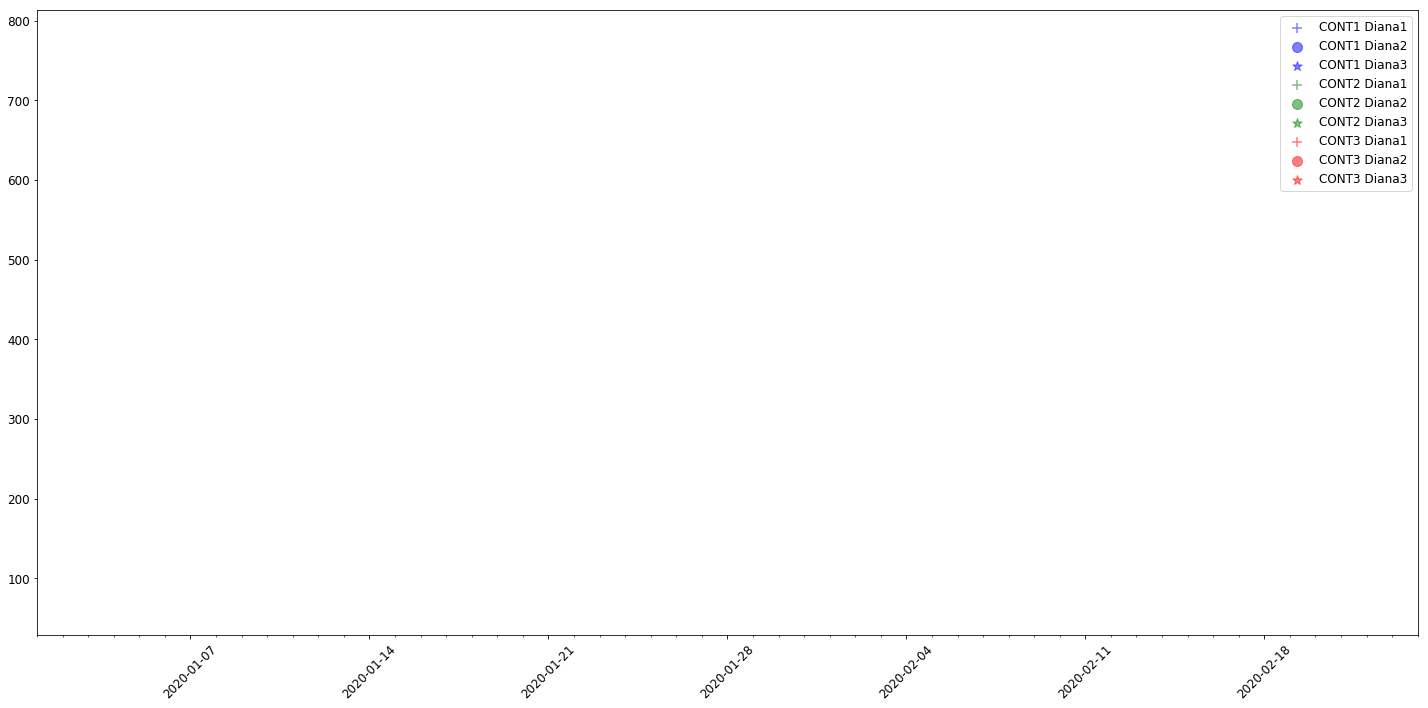

In [17]:





markers = itertools.cycle(('+', 'o', '*')) 
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 

#plot the data
# plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
for qc_id in ['CONT1','CONT2','CONT3']:
    df_tempory = df[df[' QC ID'] == qc_id]
    colour = next(colours)
    for analyzer in analyzers:
        df_tempory2 = df_tempory[df_tempory[' Analyzer'] == analyzer]
        plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values,s=100,c=colour,marker = next(markers),alpha=0.5,label = qc_id+' '+analyzer)

        
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator()  # every week
days = mdates.DayLocator()  # every day
hours = mdates.HourLocator(interval=4)  # every hour


if (max_date-min_date).days > 7:
    ax.xaxis.set_major_locator(weeks) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(days) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=45)
if (max_date-min_date).days <= 7:
    ax.xaxis.set_major_locator(days) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(hours) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=90)
    

ax.set_xlim([min_date,max_date])

#display the plot
plt.legend(bbox_to_anchor=(1.0, 1.00))

plt.tight_layout()
plt.savefig('./all_analysers_and_controls_CONT1.png',dpi=300)
# plt.savefig('/Users/SPH/qc_data/all_analysers_and_controls.png',dpi=300)

plt.show()

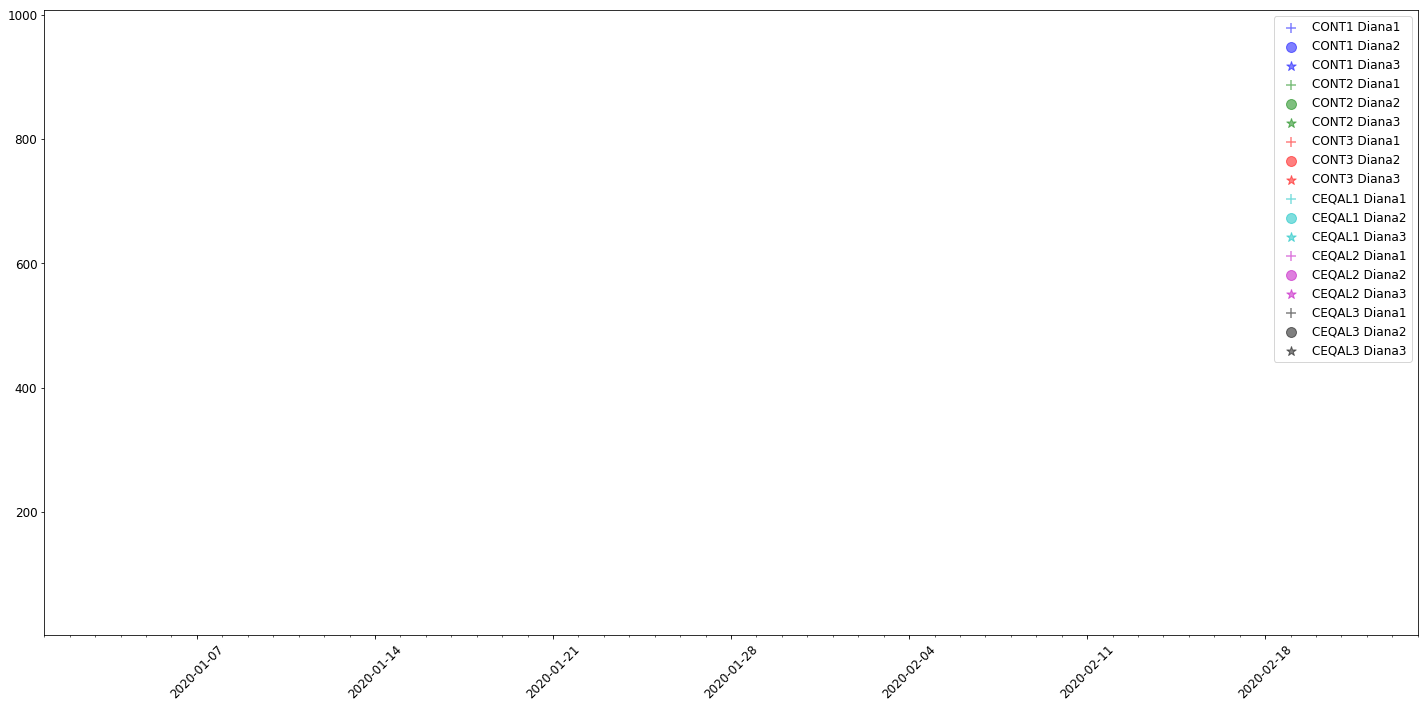

In [18]:



markers = itertools.cycle(('+', 'o', '*')) 
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 

#plot the data
# plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
for qc_id in qc_ids:
    df_tempory = df[df[' QC ID'] == qc_id]
    colour = next(colours)
    for analyzer in analyzers:
        df_tempory2 = df_tempory[df_tempory[' Analyzer'] == analyzer]
        plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values,s=100,c=colour,marker = next(markers),alpha=0.5,label = qc_id+' '+analyzer)

        
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator()  # every week
days = mdates.DayLocator()  # every day
hours = mdates.HourLocator(interval=4)  # every hour


if (max_date-min_date).days > 7:
    ax.xaxis.set_major_locator(weeks) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(days) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=45)
if (max_date-min_date).days <= 7:
    ax.xaxis.set_major_locator(days) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(hours) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=90)
    

ax.set_xlim([min_date,max_date])

#display the plot
plt.legend(bbox_to_anchor=(1.0, 1.00))

plt.tight_layout()
plt.savefig('./all_analysers_and_controls.png',dpi=300)
# plt.savefig('/Users/SPH/qc_data/all_analysers_and_controls.png',dpi=300)

plt.show()

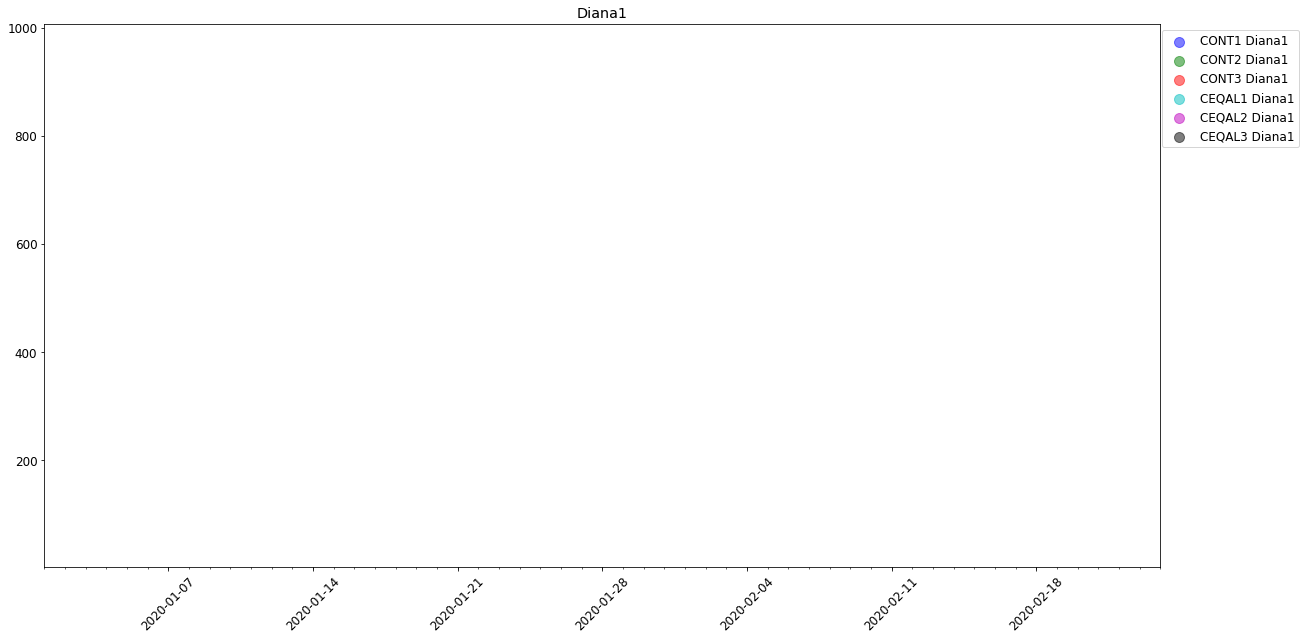

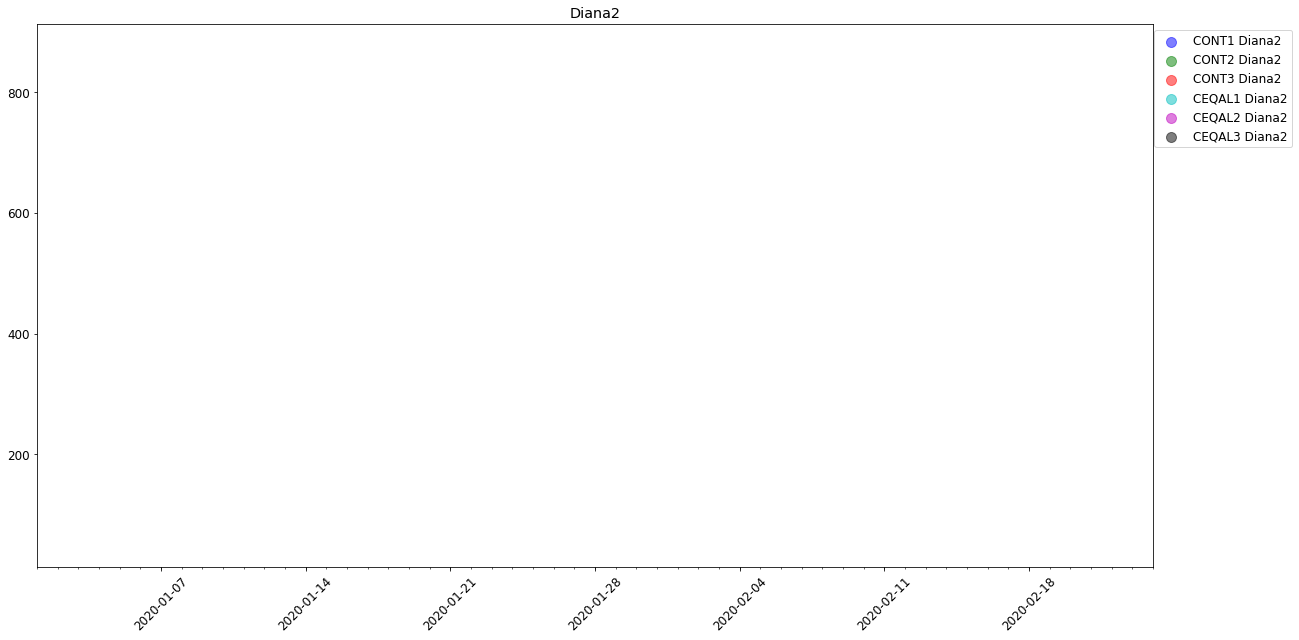

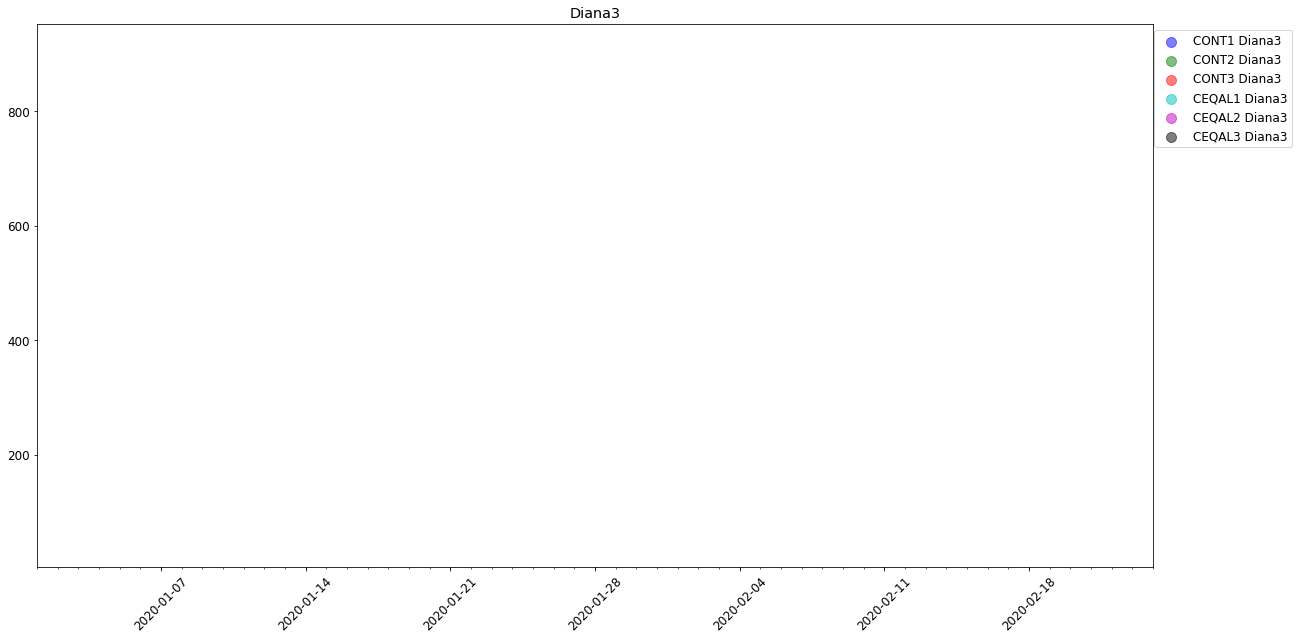

In [19]:


markers = itertools.cycle(('+', 'o', '*')) 
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 

for analyzer in analyzers:
    #plot the data
    # plt.figure()
    f, ax = plt.subplots(figsize=(20,10))
    for qc_id in qc_ids:
        df_tempory = df[df[' QC ID'] == qc_id]
        colour = next(colours)
    #     for analyzer in analyzers:
        df_tempory2 = df_tempory[df_tempory[' Analyzer'] == analyzer]
        plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values,s=100,c=colour,alpha=0.5,label = qc_id+' '+analyzer)

        

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    weeks = mdates.WeekdayLocator()  # every week
    days = mdates.DayLocator()  # every day
    hours = mdates.HourLocator(interval=4)  # every 4th hour


    if (max_date-min_date).days > 7:
        ax.xaxis.set_major_locator(weeks) # could substitute in years, months, or days for 'weeks' here (as defined above)
        ax.xaxis.set_minor_locator(days) # interval for the small lines on the axis
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
        plt.xticks(rotation=45)
    if (max_date-min_date).days <= 7:
        ax.xaxis.set_major_locator(days) # could substitute in years, months, or days for 'weeks' here (as defined above)
        ax.xaxis.set_minor_locator(hours) # interval for the small lines on the axis
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
        ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
        plt.xticks(rotation=90)


    ax.set_xlim([min_date,max_date])
        
    #display the plot
    plt.legend(bbox_to_anchor=(1.13, 1.00))

    plt.title(analyzer)
#     plt.savefig('/Users/SPH/qc_data/'+analyzer+'_all_controls.png',dpi=300)
    plt.show()

In [20]:
#save the data with the improved date column to files
df.to_csv('/Users/SPH/qc_data/cco_qc_analysis_for_excel.csv')

IOError: [Errno 2] No such file or directory: '/Users/SPH/qc_data/cco_qc_analysis_for_excel.csv'